In [1]:
import numpy as np
import pandas as pd
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import visual,describe,fe

%reload_ext autoreload

# dataset

In [3]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/Modal_Antar.csv")

In [4]:
df

,usia,pengambilan_kredit,pengalaman_kerja,jabatan_id,pendapatan,jumlah_tanggungan,pendidikan,kepemilikan,pinjaman,tenor_bulanan,kat_status
0,44,1,7,7,10046300,4,4,5,1000000,1.0,1
1,44,1,7,7,10290000,3,6,1,1000000,1.0,1
2,28,1,5,7,5327891,2,4,2,1000000,1.0,1
3,40,1,7,9,7150000,3,4,1,1000000,1.0,1
4,41,1,3,7,5150000,3,5,1,1000000,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
128,50,1,3,9,5500000,2,4,1,1000000,1.0,1
129,56,1,7,9,2250000,4,2,1,1000000,1.0,1
130,26,2,5,7,4678138,2,4,1,3000000,6.0,1
131,30,1,3,9,5200000,2,4,1,1000000,1.0,1


# Boxplot

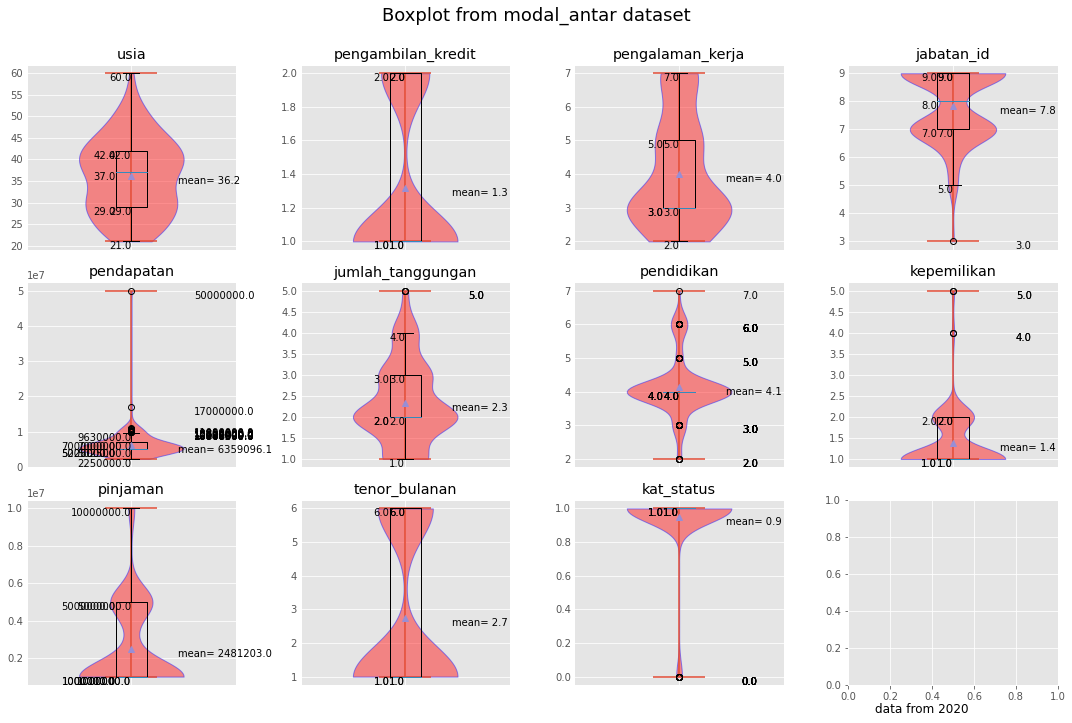

In [16]:
visual.boxplot(df,df.columns,row_col=(3,4),title="modal_antar",footnote='data from 2020')

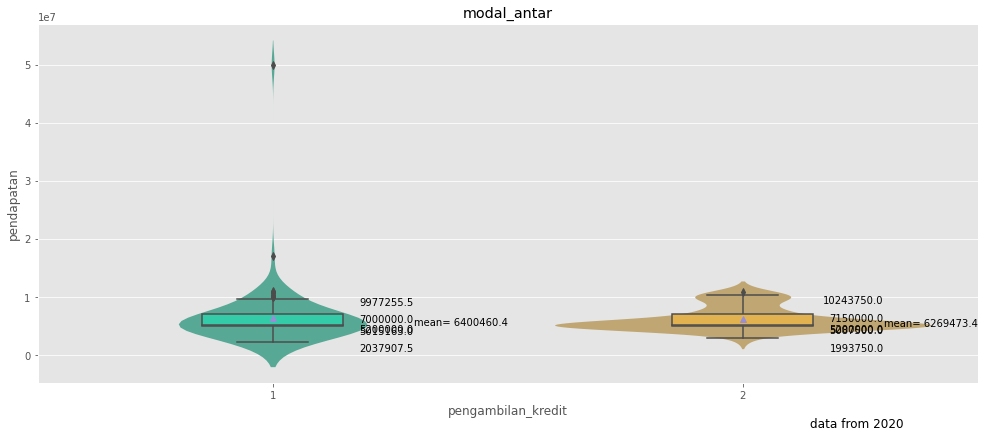

In [62]:
visual.boxplot_categorical(df,'pengambilan_kredit','pendapatan',
                           title="modal_antar",footnote='data from 2020')

# histogram

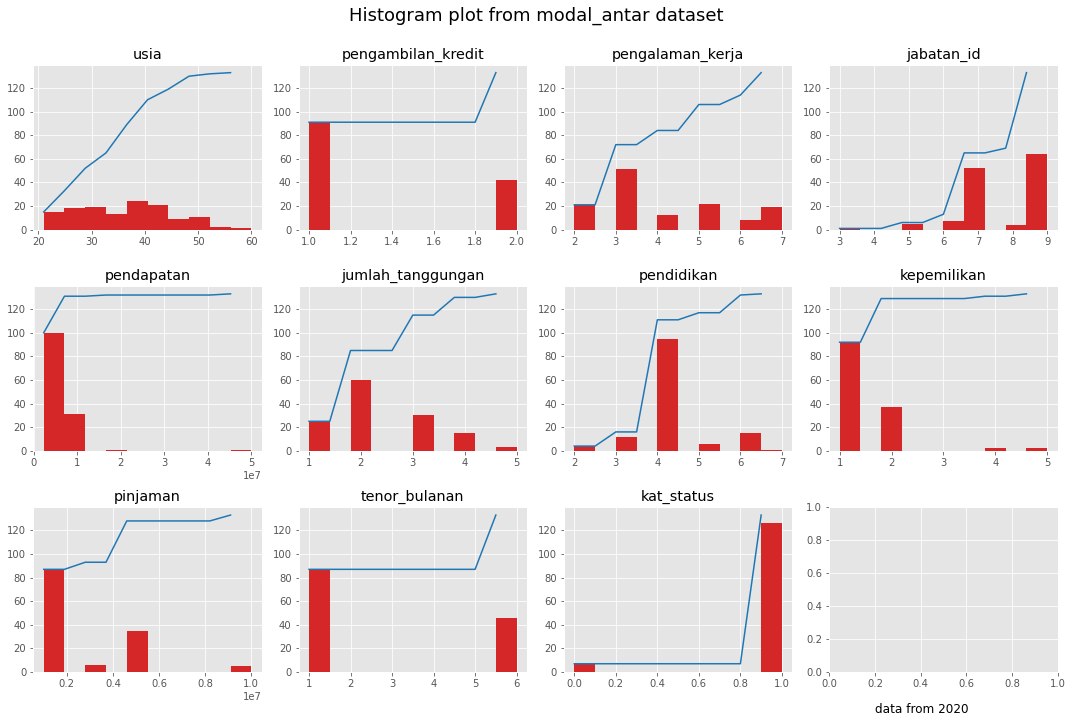

In [103]:
visual.histogram(df,df.columns,row_col=(3,4),title="modal_antar",footnote='data from 2020')

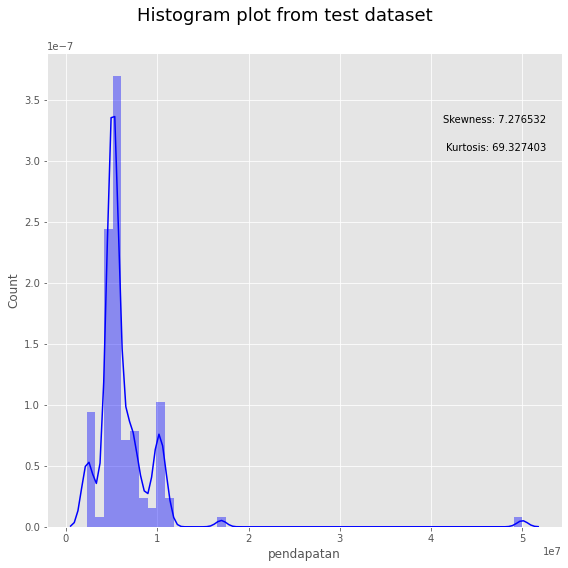

In [112]:
visual.single_column_histogram(df,'pendapatan',50,'test')

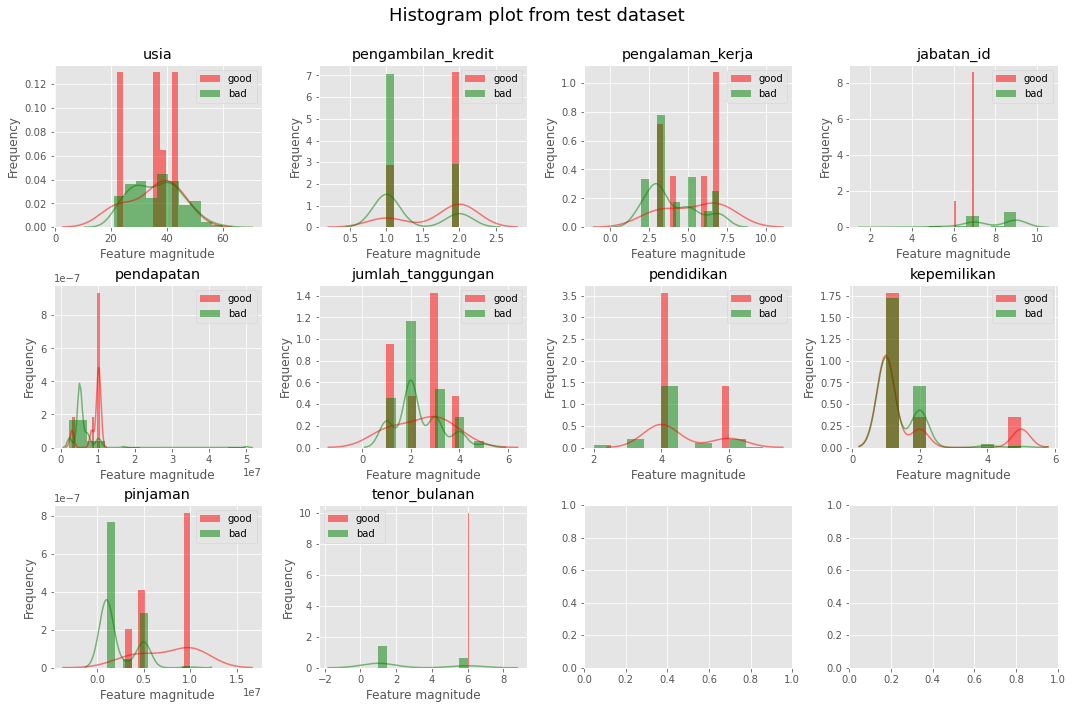

In [148]:
visual.histogram_columns(df,'kat_status',label=["good", "bad"],
                         row_col=(3,4),bins=10,title='test')

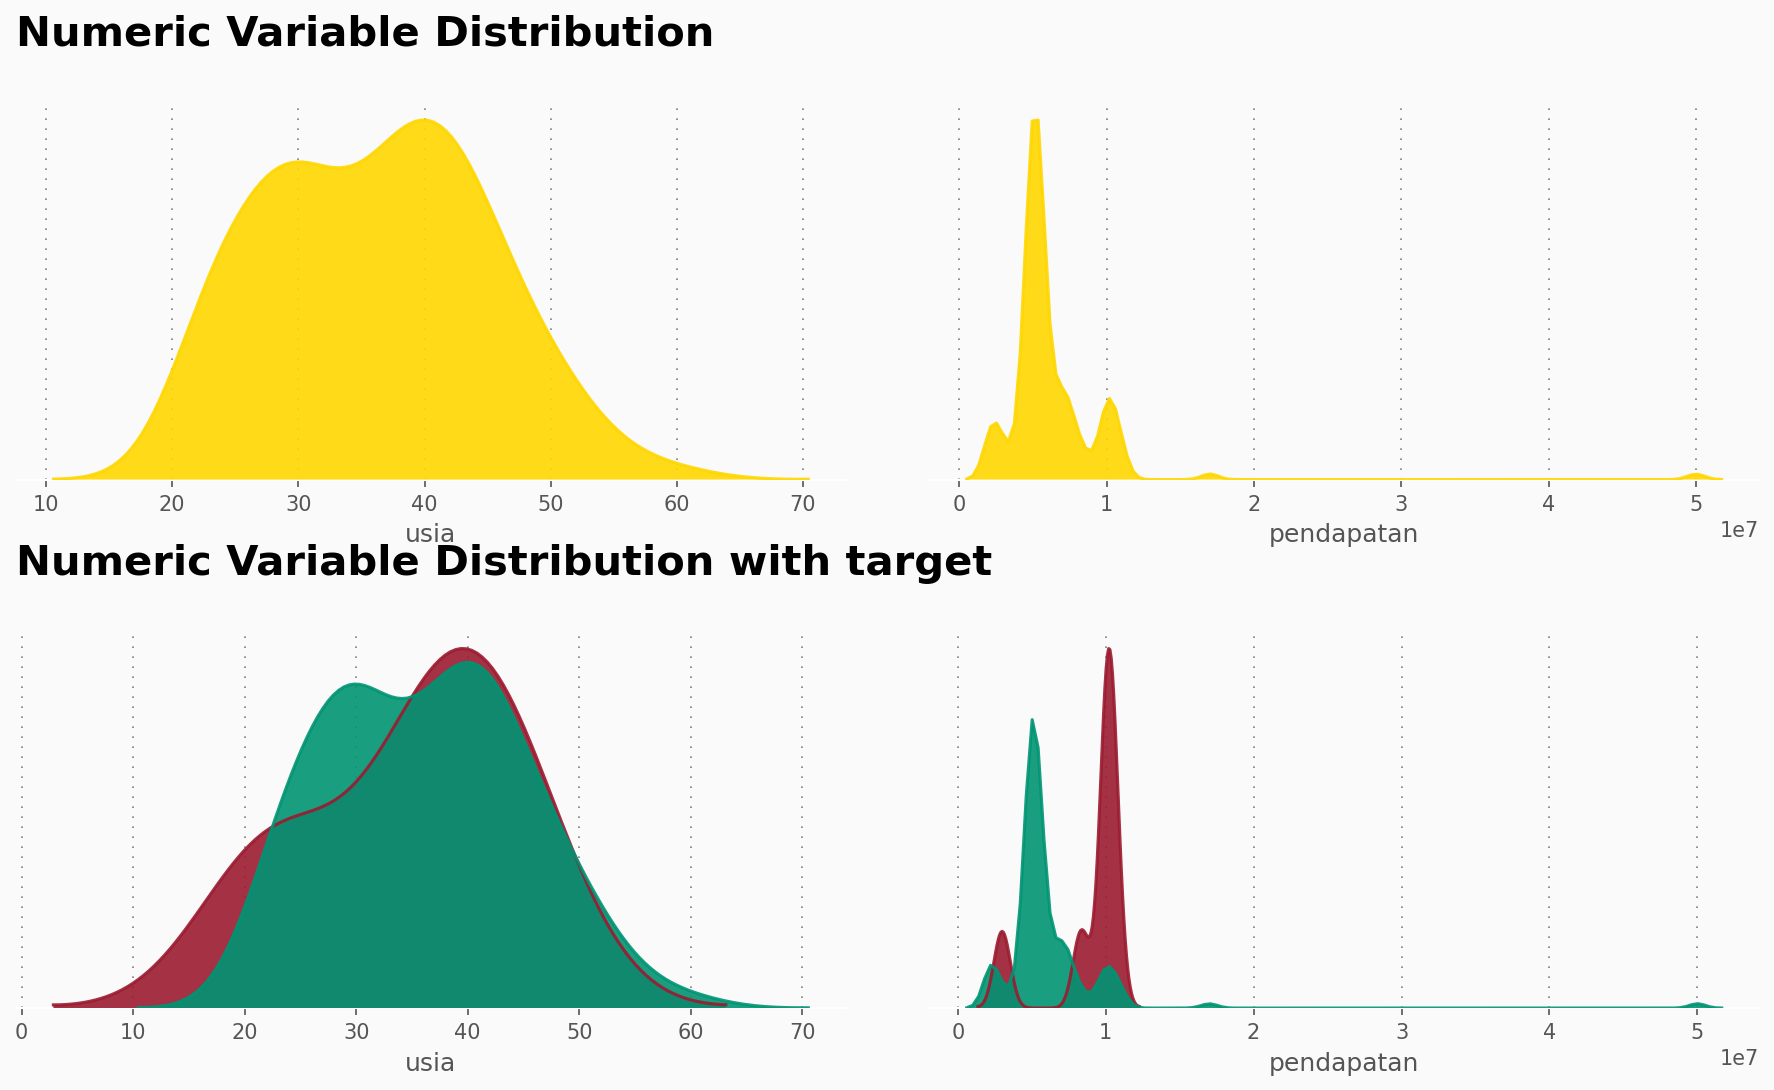

In [32]:
visual.dist_cont_plot(df,['usia','pendapatan'],'kat_status',[0, 1])

In [33]:
col = ['pengambilan_kredit', 'pengalaman_kerja', 'jabatan_id',
                         'jumlah_tanggungan', 'pendidikan', 'kepemilikan',
                         'pinjaman', 'tenor_bulanan', 'kat_status']

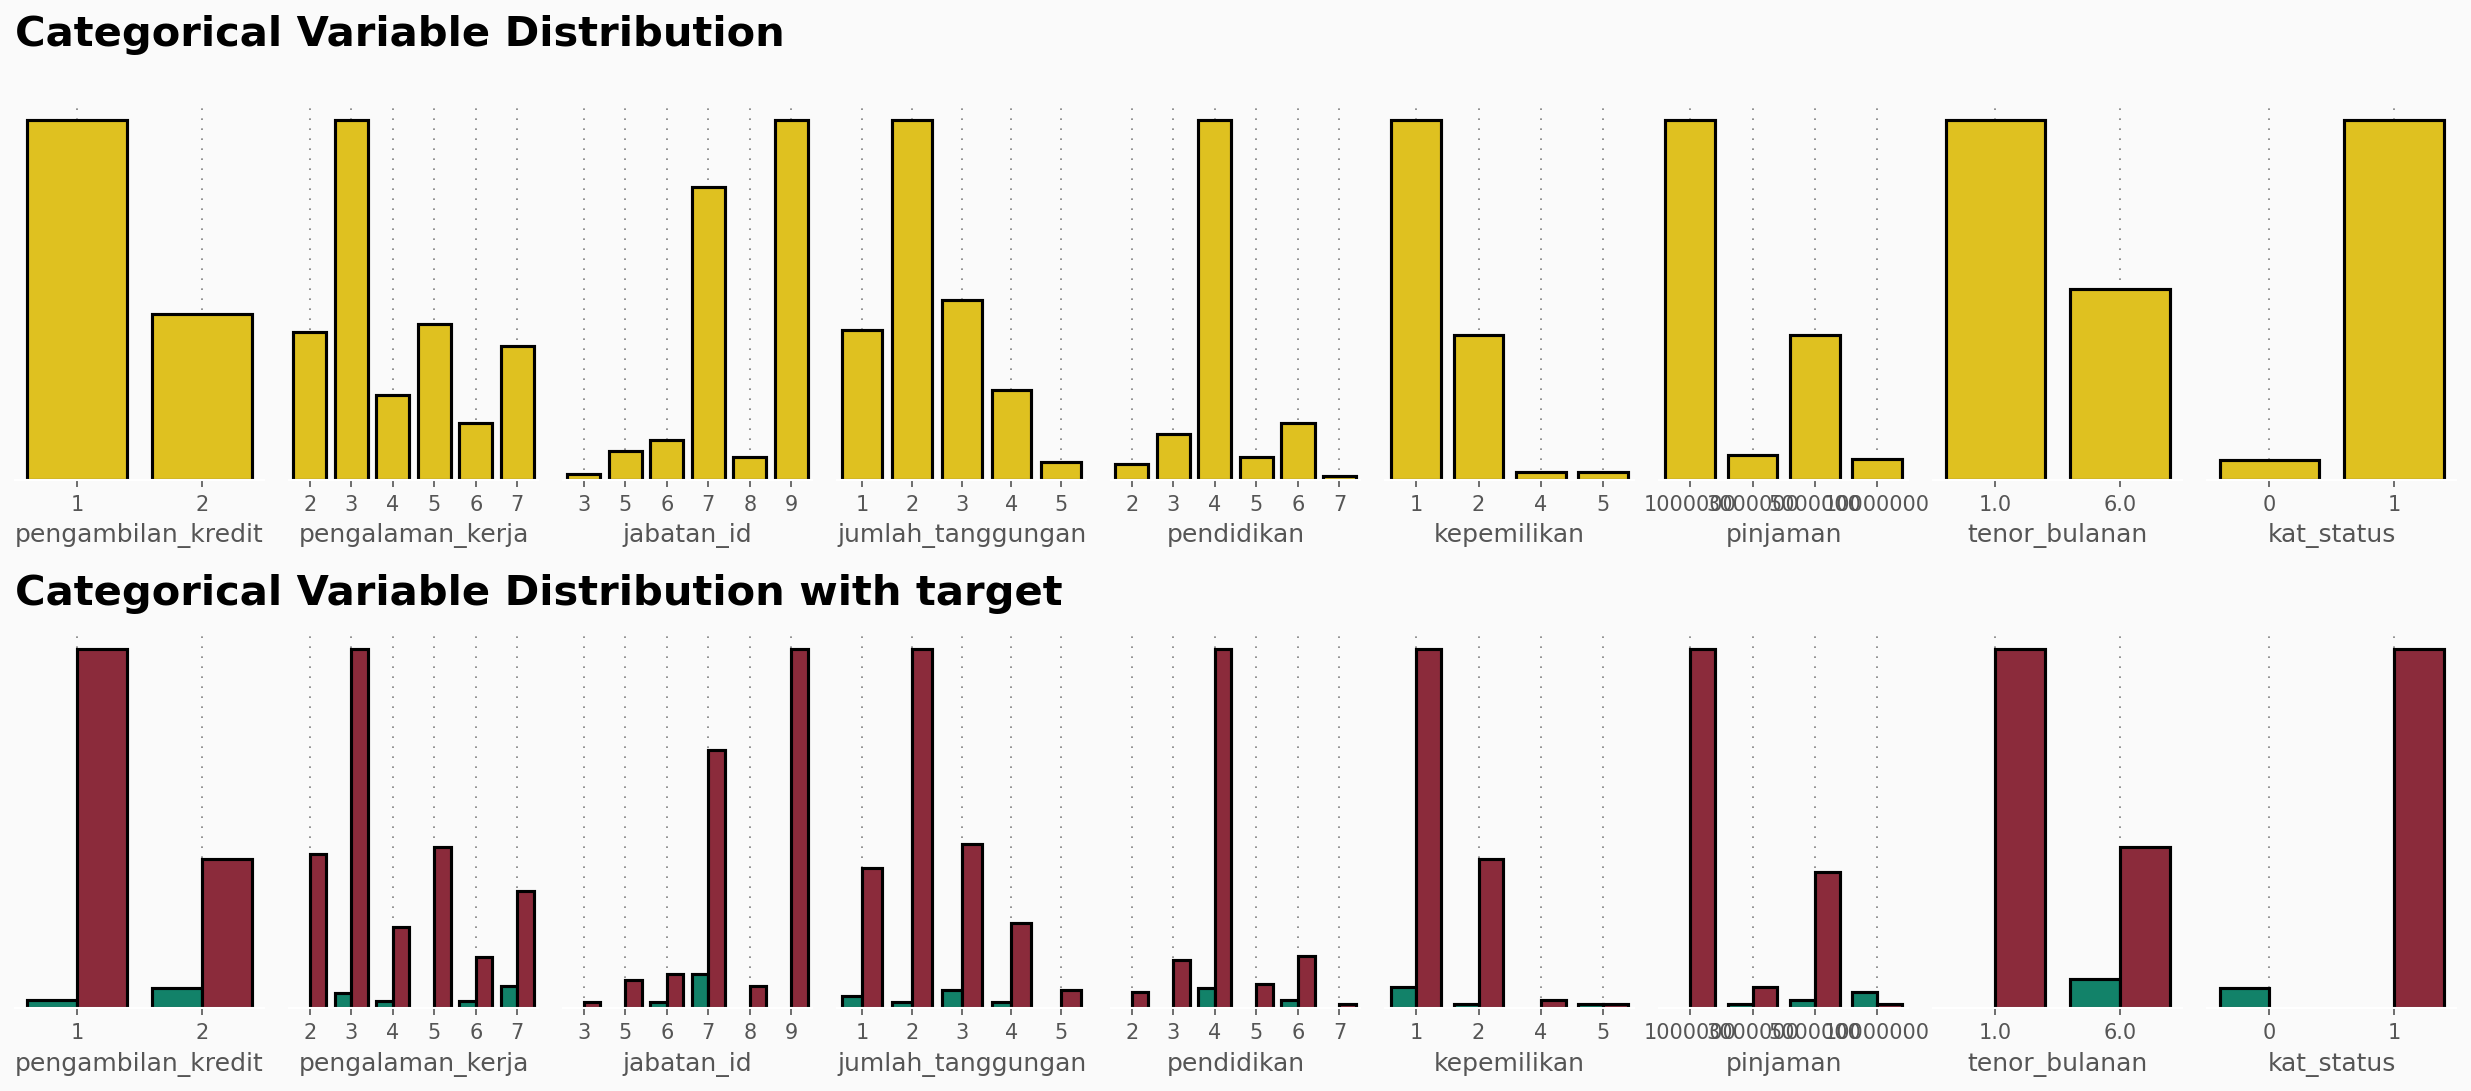

In [34]:
visual.dist_cat_plot(df,col,'kat_status',[0, 1])

# risk potential plot

In [5]:
df = pd.read_csv('E:/gitlab/machine-learning/dataset/heart/heart.csv')

In [6]:
df.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max. HR Acheived',
       'Exercise Induced Angina', 'ST Depression', 'ST Slope', 'Num. Major Blood Vessels', 'Thalassemia', 'Condition']

In [7]:
# Swapped targets around as my reserach indicates that these have been labelled incorrectly

df['Condition'] = df['Condition'].apply(lambda x: 1 if x == 0 else 0)

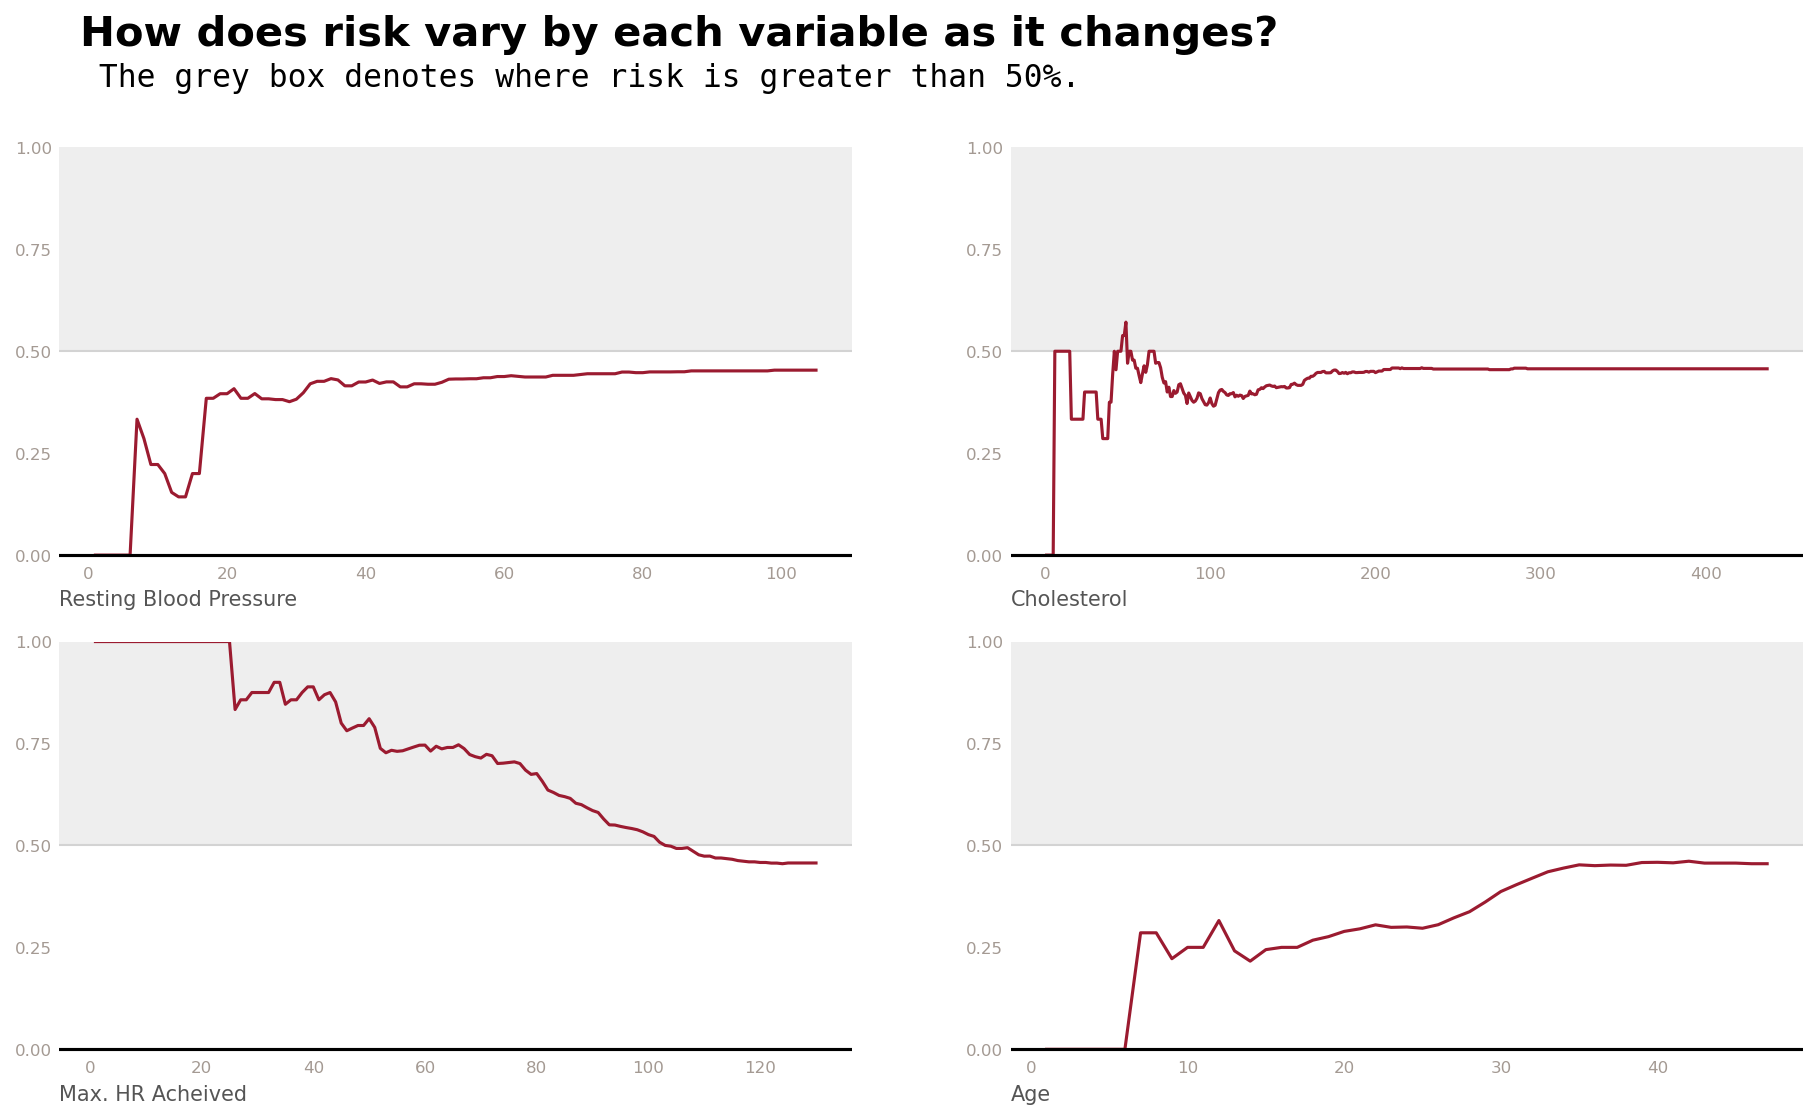

In [6]:
visual.risk_potential_plot(df,['Resting Blood Pressure','Cholesterol','Max. HR Acheived','Age']
                           ,'Condition',(2,2))

# Observations

So far we have established a few important points.

1 - As resting blood pressure increasres, so to does risk of heart disease

2 - Rising Choloseterol does not appear to be a major indicator

3 - A low Max HR acheived is a big warning sign. 

4 - Risk of heart disease increases with age


In [54]:
y_label = [' ','20 ~ 30', '30 ~ 40', '40 ~ 50', '50 ~ 60','60 ~ 70', '70 ~ 80', '80 ~ 90']

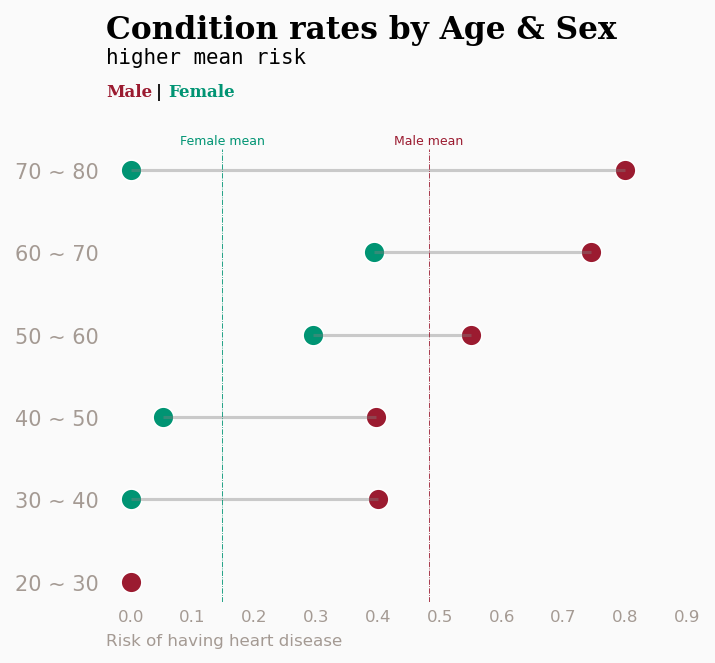

In [148]:
res = visual.risk_two_plot(df,'Age','Sex','Condition',['Male','Female'],y_label)

# bar and pie plot

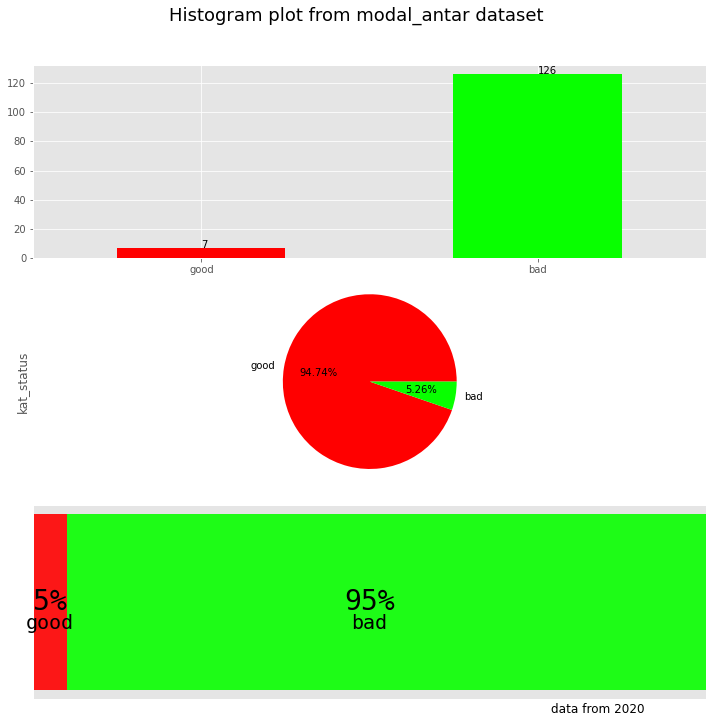

In [59]:
visual.bar_and_pie_plot(df,'kat_status',label=["good", "bad"],
                        title="modal_antar",footnote='data from 2020')

In [10]:
df['kat_status'].value_counts()

1    126
0      7
Name: kat_status, dtype: int64

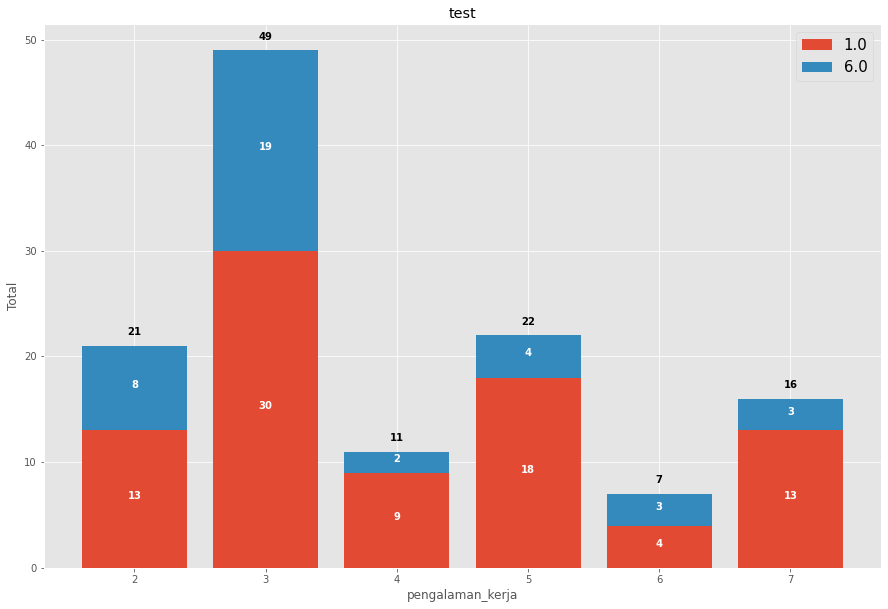

In [173]:
visual.stack_bar(df,'pengalaman_kerja','tenor_bulanan',
                 [1,6],'kat_status',title='test')

In [3]:
df_21_full=pd.read_csv(f"E:/gitlab/machine-learning/dataset/Tokyo 2021 dataset.csv") 
col = ['Rank','Team/NOC','Bronze Medal','Silver Medal','Gold Medal','Total']

In [36]:
visual.bar_table_plot(df_21_full[col],col,'Team/NOC','Japan',['Bronze Medal','Silver Medal','Gold Medal'])

Rank,Team/NOC,Bronze Medal,Silver Medal,Gold Medal,Total
1,United States of America,33,41,39,113
2,People's Republic of China,18,32,38,88
3,Japan,17,14,27,58
4,Great Britain,22,21,22,65
5,ROC,23,28,20,71
6,Australia,22,7,17,46
7,Netherlands,14,12,10,36
8,France,11,12,10,33
9,Germany,16,11,10,37
10,Italy,20,10,10,40


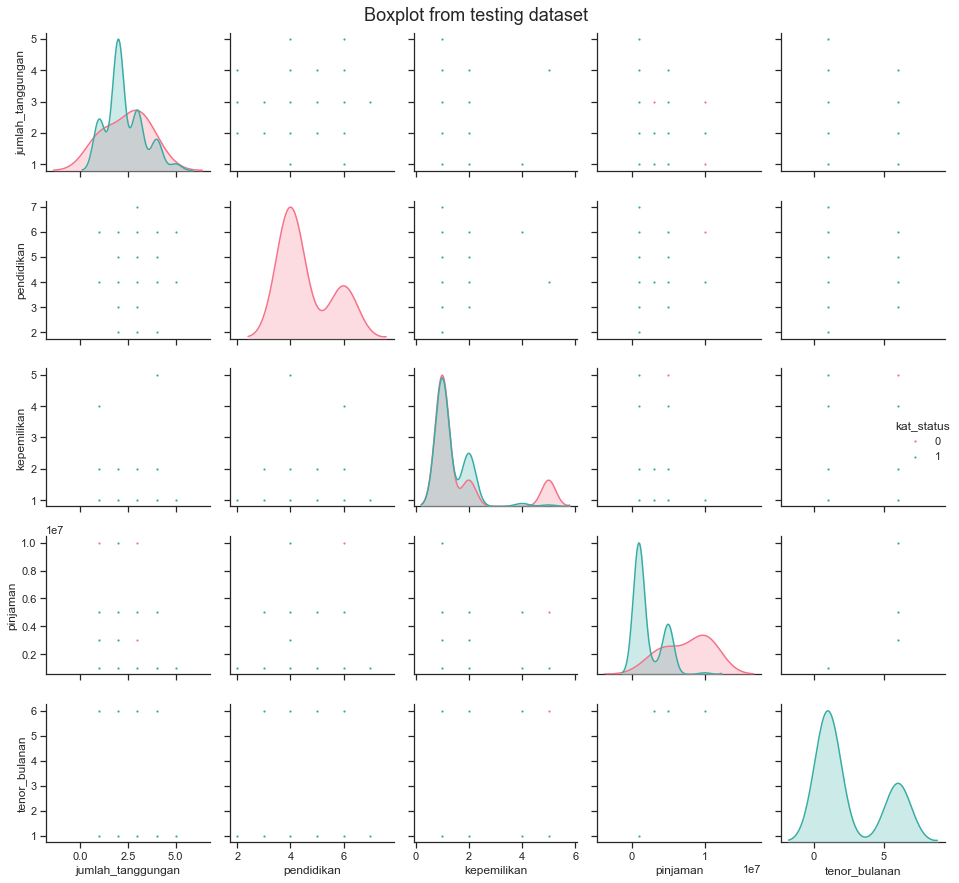

In [204]:
visual.pairplot(df[df.columns[5:13]],'kat_status',kind='scatter',
                diag_kind="kde",title="testing")

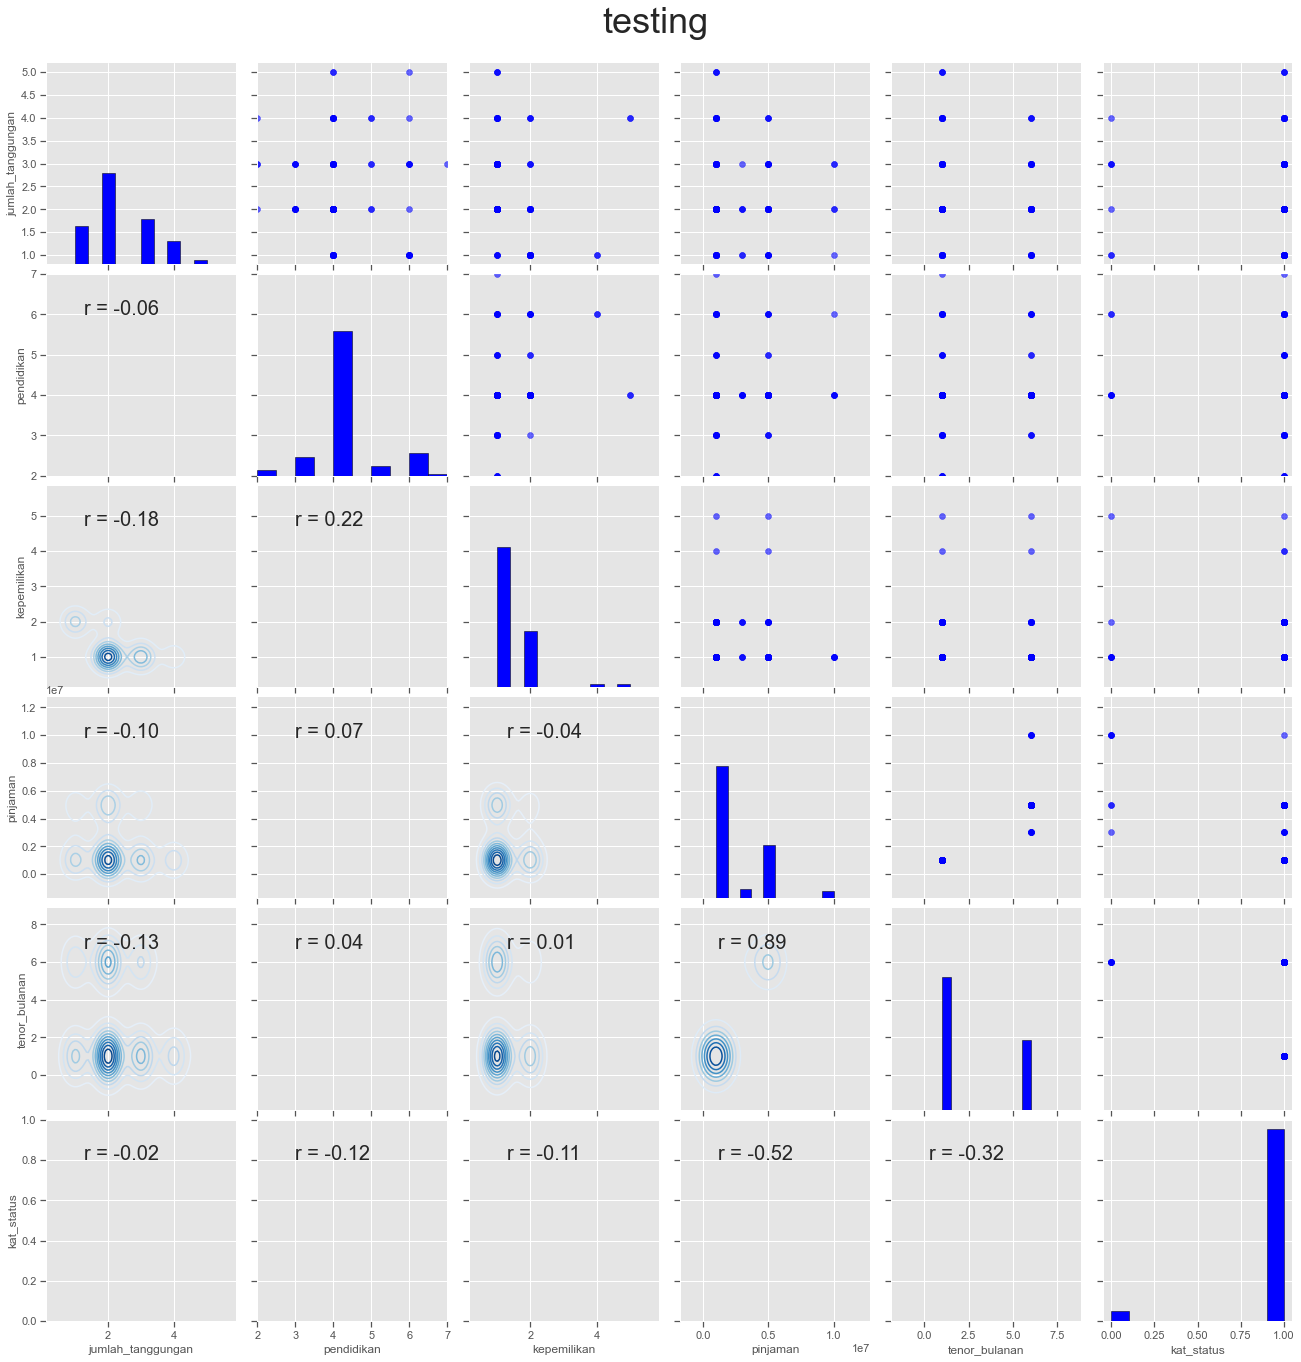

In [209]:
visual.pairplot_detail(df[df.columns[5:13]],df.columns[5:13],'testing')

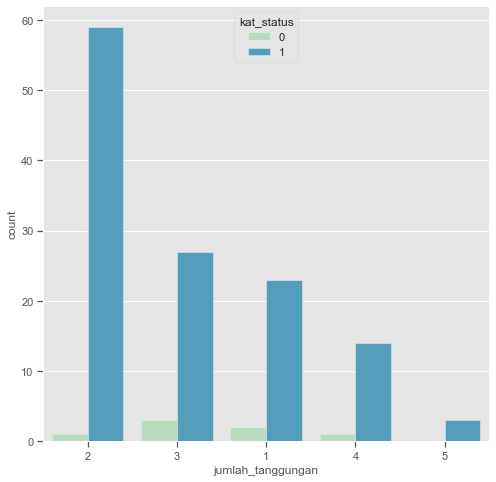

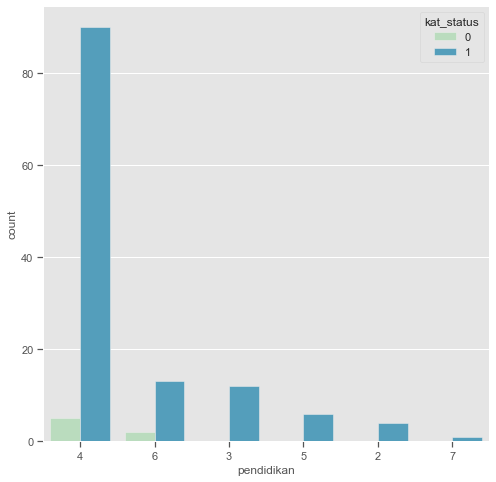

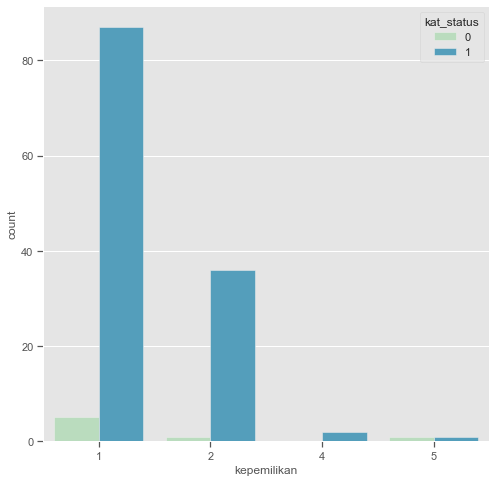

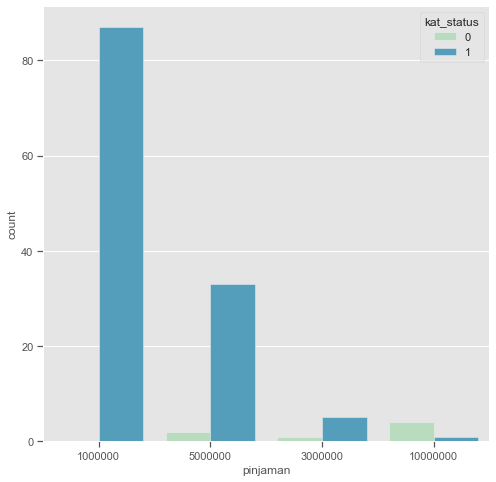

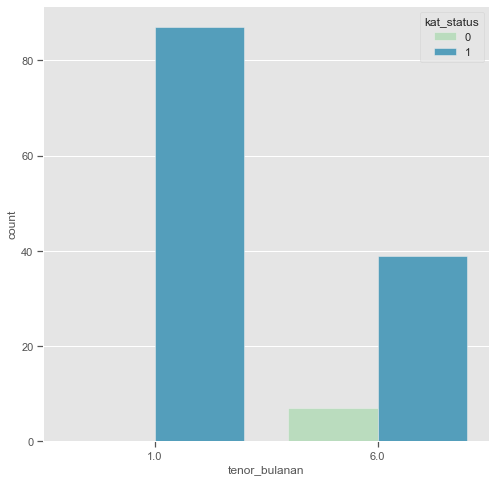

In [212]:
visual.bar_plot(df[df.columns[5:13]],df.columns[5:13])

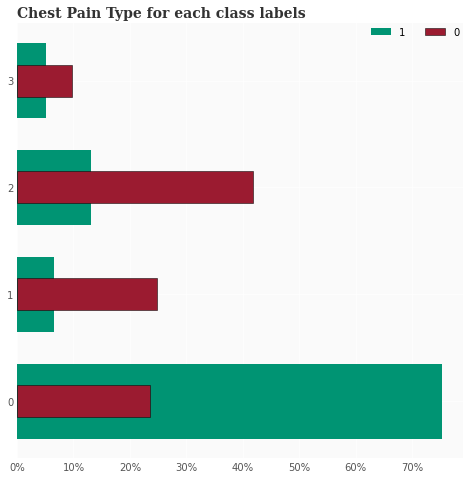

In [63]:
visual.stack_bar_plot(df,'Chest Pain Type','Condition', labels=[0,1],footnote=None)

In [5]:
df_1 = df.reset_index()

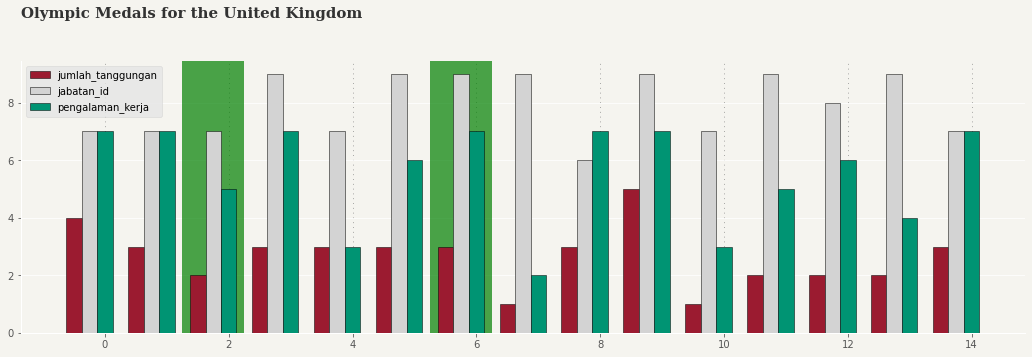

In [64]:
visual.combine_bar_plot(df_1[:15],'index',types='unstack',
                       col_list=["pengalaman_kerja","jabatan_id","jumlah_tanggungan"],
                        title='Olympic Medals for the United Kingdom',sub_title=None,footnote=None)

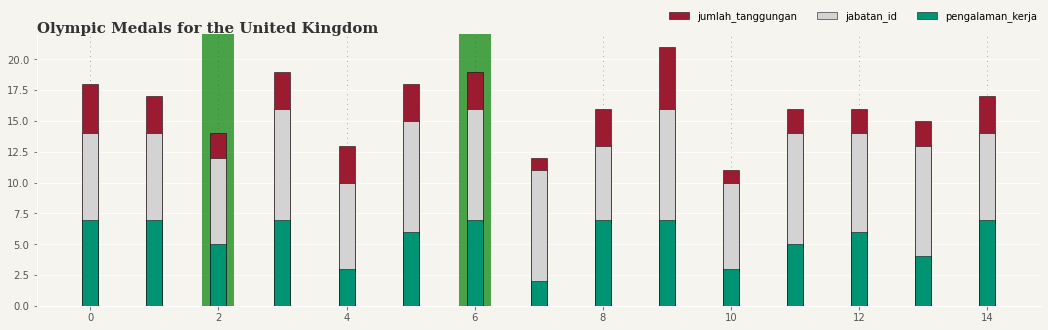

In [65]:
visual.combine_bar_plot(df_1[:15],'index',types='stack',
                        col_list=["pengalaman_kerja","jabatan_id","jumlah_tanggungan"],
                        title='Olympic Medals for the United Kingdom',sub_title=None,footnote=None)

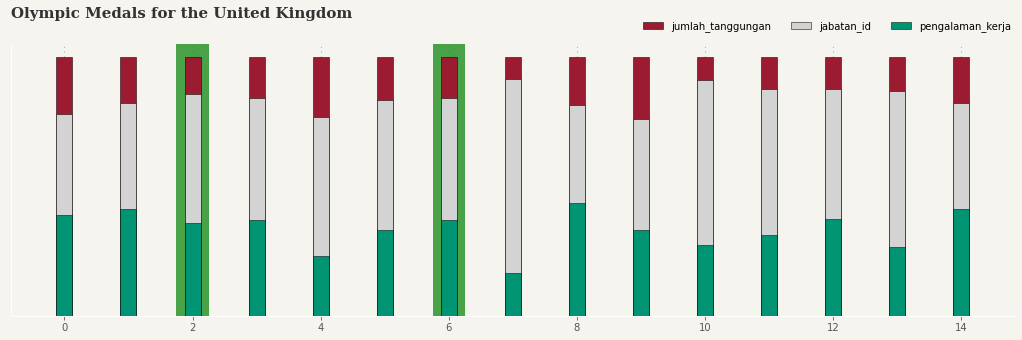

In [66]:
visual.combine_bar_plot(df_1[:15],'index',types='stack_100',
                        col_list=["pengalaman_kerja","jabatan_id","jumlah_tanggungan"],
                        title='Olympic Medals for the United Kingdom',sub_title=None,footnote=None)

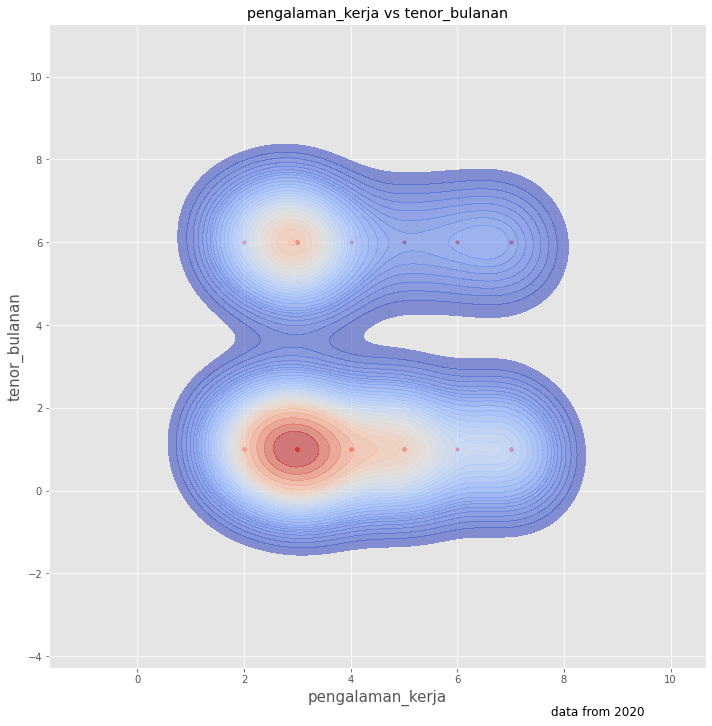

In [8]:
visual.scaterplot(df,'pengalaman_kerja','tenor_bulanan',footnote='data from 2020')

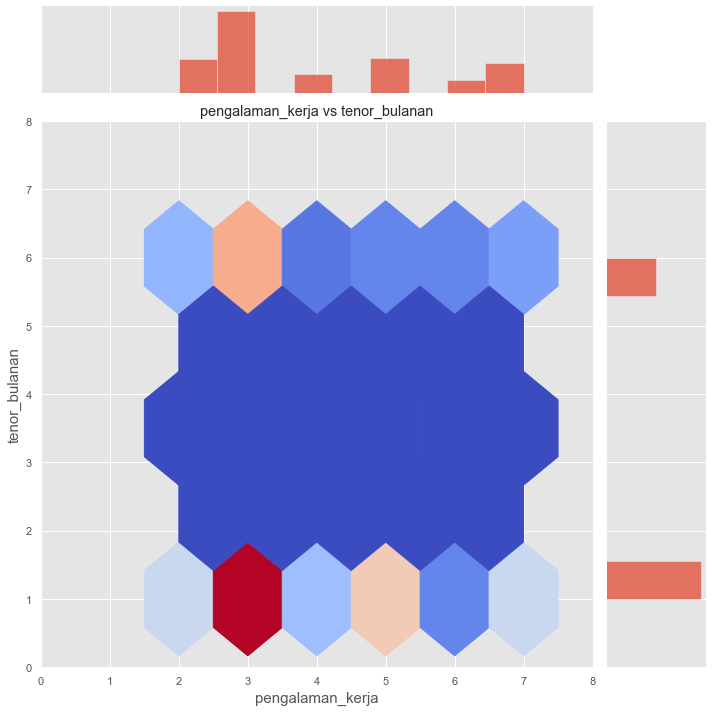

In [36]:
visual.scaterplot_2(df,'pengalaman_kerja','tenor_bulanan',footnote='data from 2020')

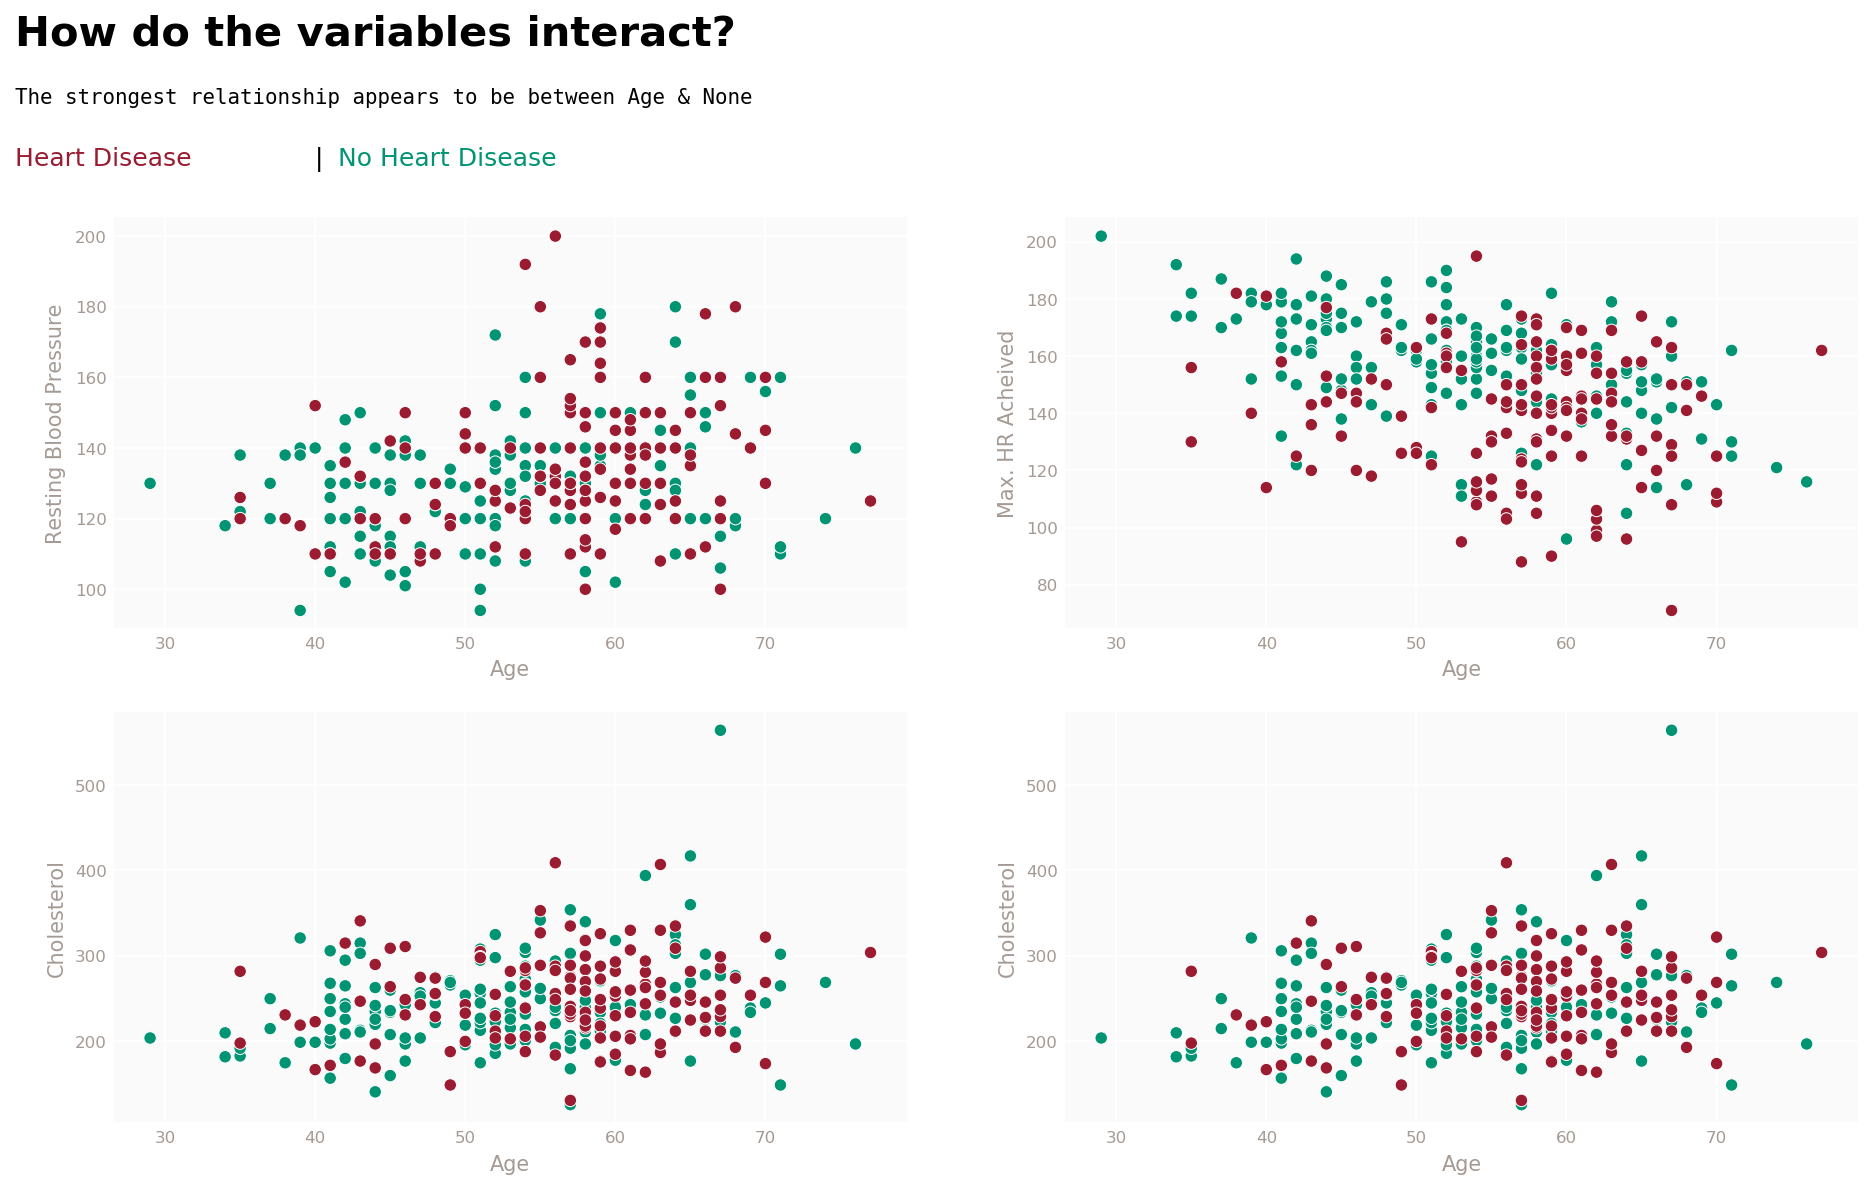

In [17]:
visual.scater_cor_plot(df,['Resting Blood Pressure','Max. HR Acheived','Cholesterol','Cholesterol'],
                       'Age','Condition',(2,2),['Heart Disease','No Heart Disease'],
                       footnote=None)

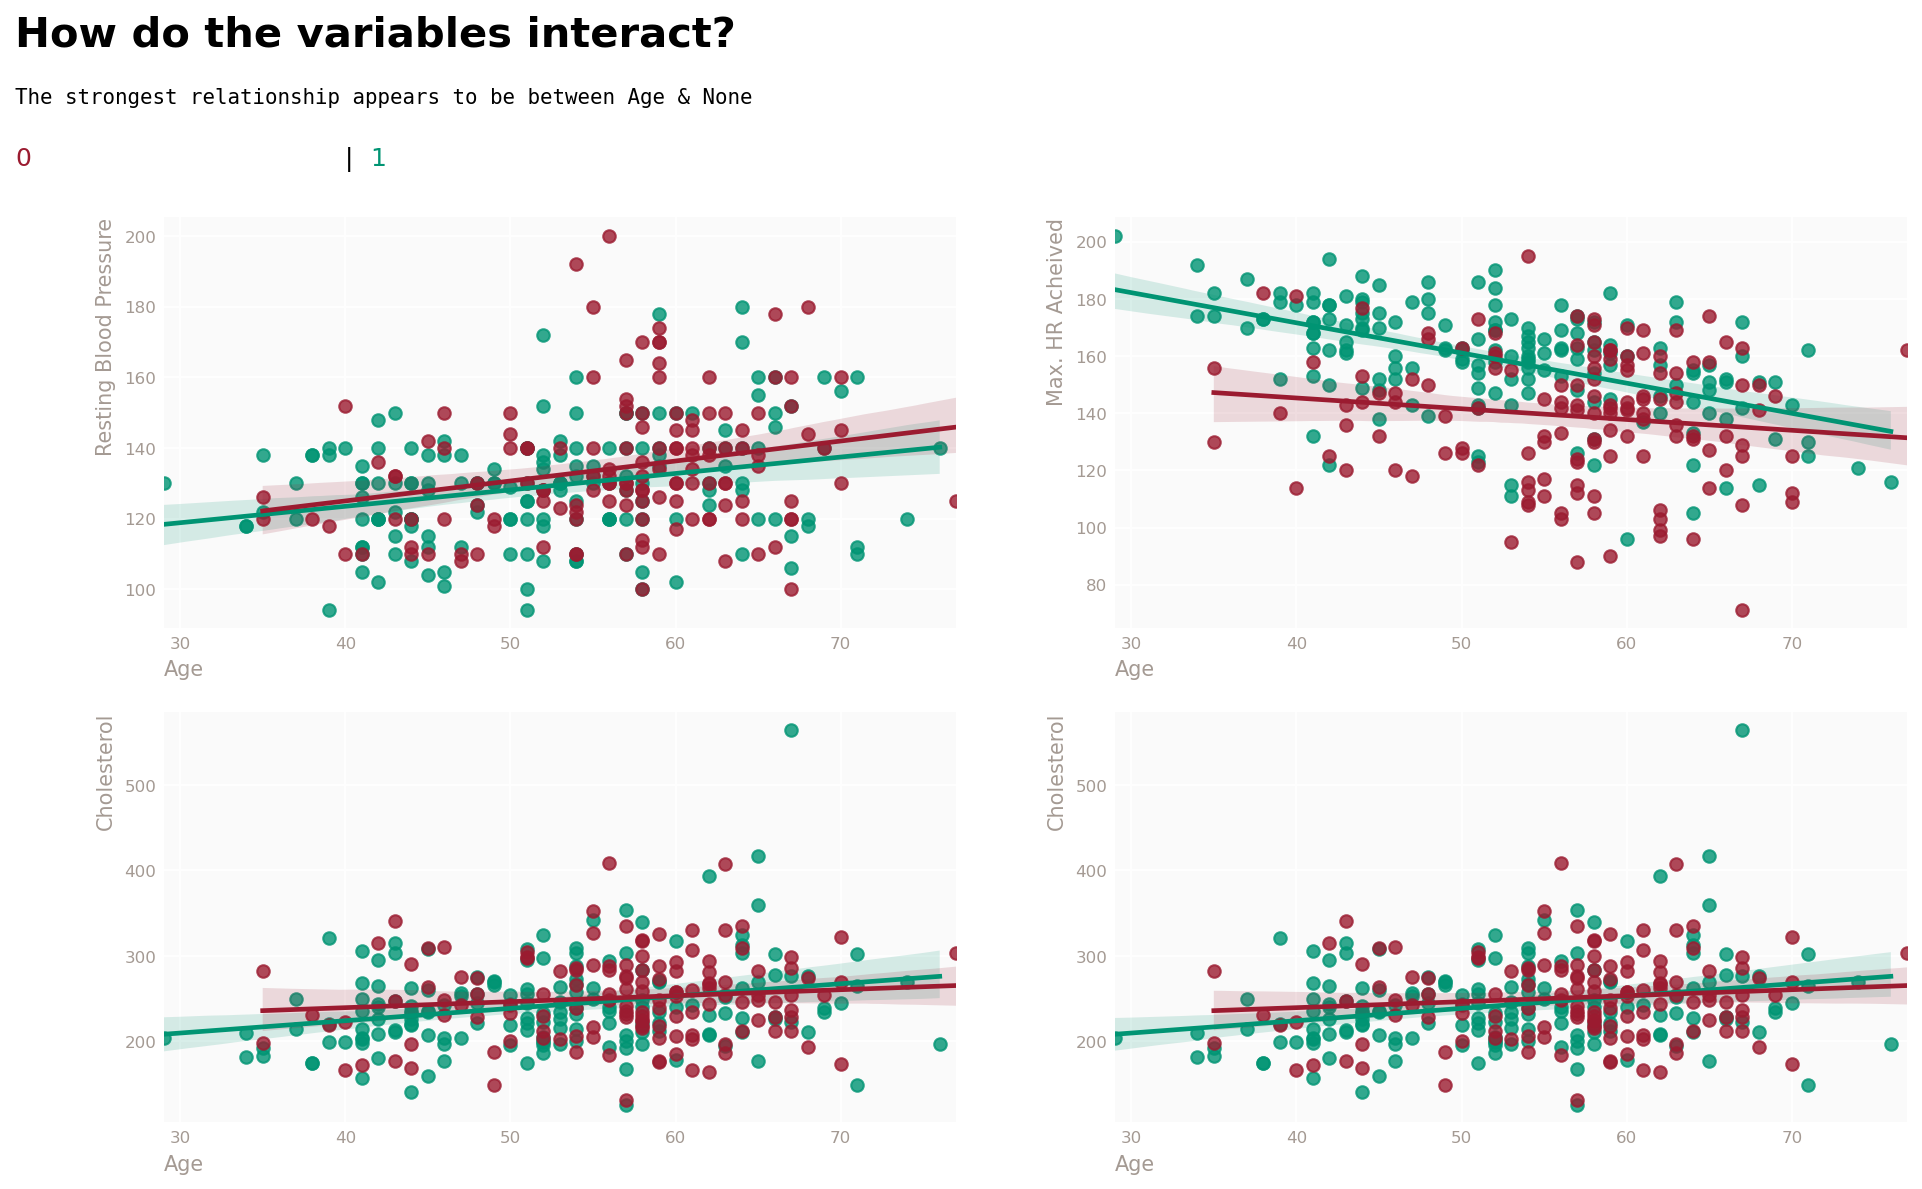

In [40]:
visual.scater_cor_plot(df,['Resting Blood Pressure','Max. HR Acheived','Cholesterol','Cholesterol'],
                       'Age','Condition',(2,2),[0,1],
                       reg=True,footnote=None)

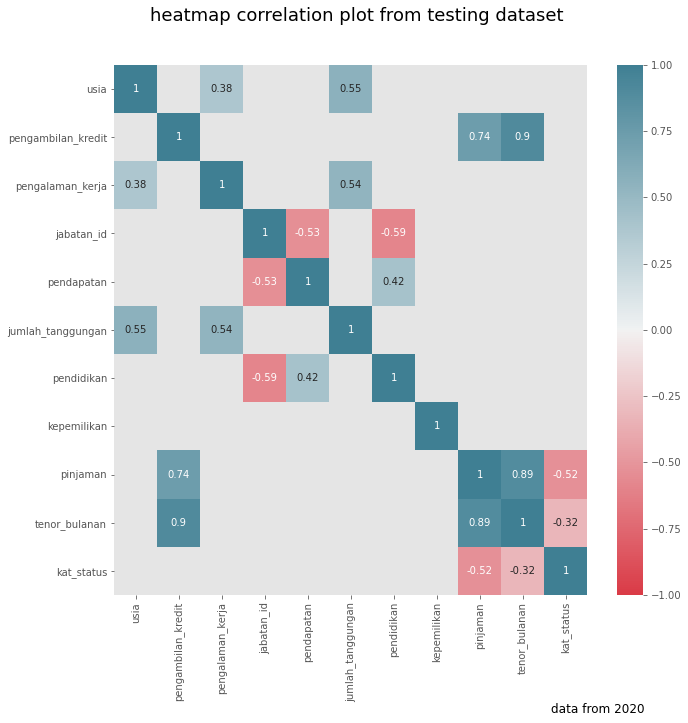

In [55]:
visual.heatmap_corr(df,"pearson",limit=0.3,title='testing',footnote='data from 2020')

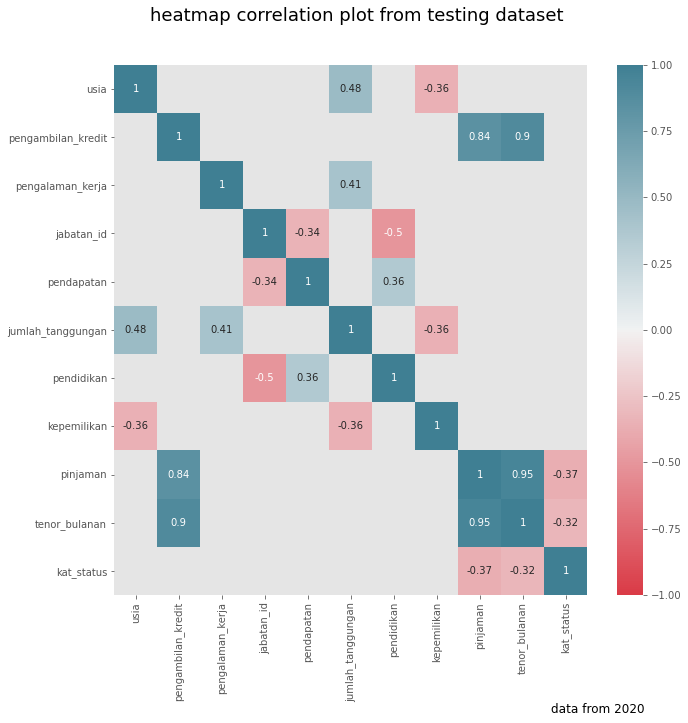

In [56]:
visual.heatmap_corr(df,"kendall",limit=0.3,title='testing',footnote='data from 2020')

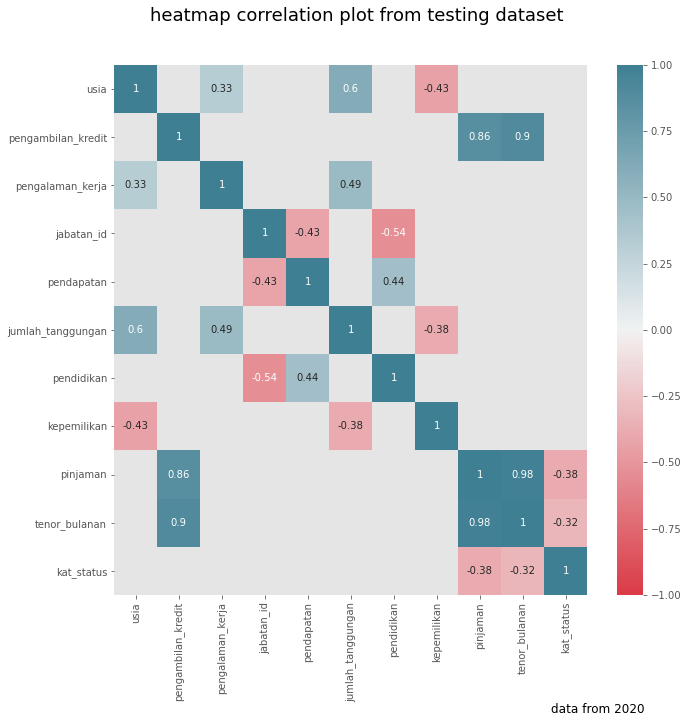

In [57]:
visual.heatmap_corr(df,"spearman",limit=0.3,title='testing',footnote='data from 2020')

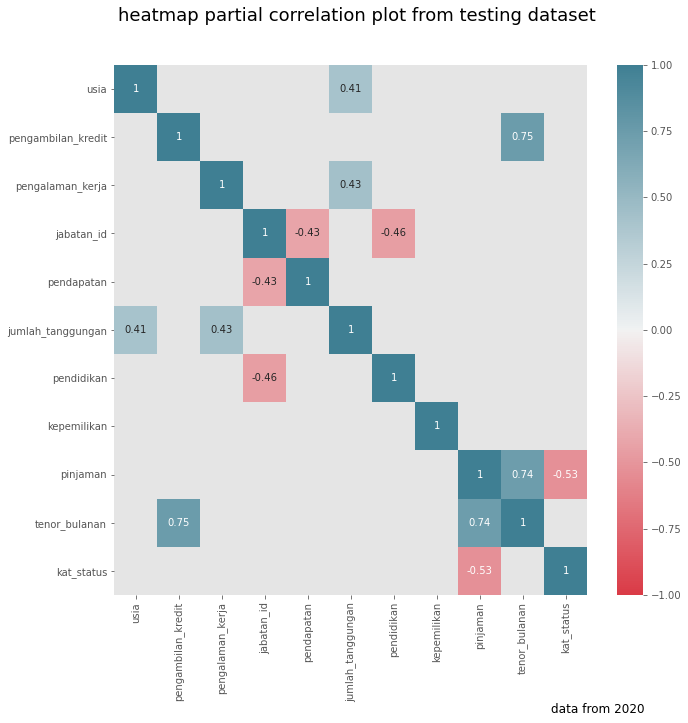

In [58]:
visual.heatmap_partial_corr(df,limit=0.3,title='testing',footnote='data from 2020')

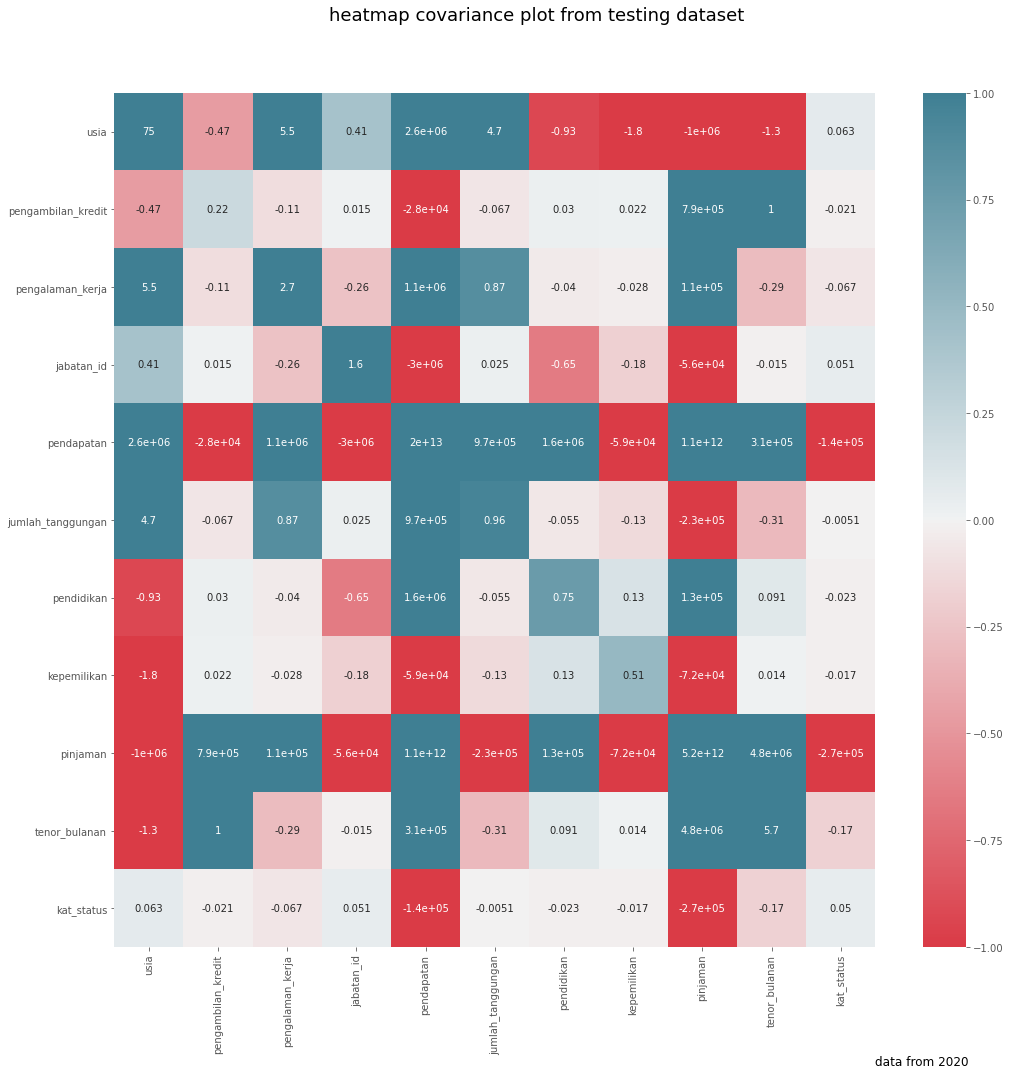

In [54]:
main_data_coor = visual.heatmap_cov(df,title='testing',footnote='data from 2020')

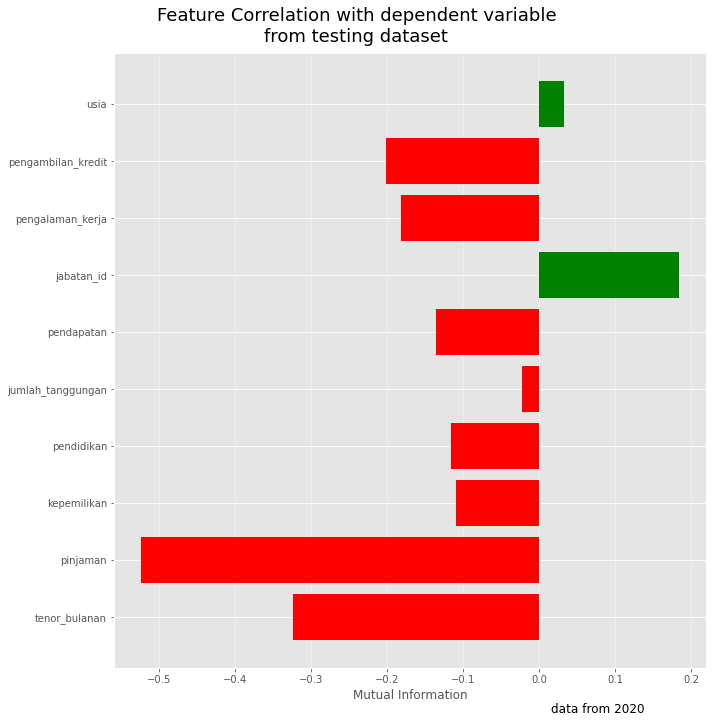

In [16]:
visual.label_corr(df,'kat_status',type_coor="pearson",title='testing',footnote='data from 2020')

In [ ]:
visual.label_chi(data,['Alasan jika tidak membuka dashboard','Teknologi level','Lama berbudidaya','Kesuksesan budidaya'],
                 'Keuangan',title=None,footnote=None)

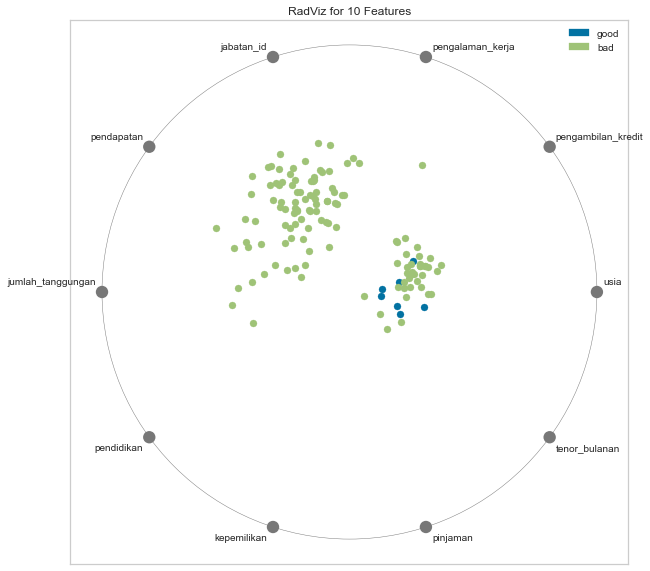

In [5]:
visual.radviz(df,'kat_status',labels=["good", "bad"])

# PCA detail

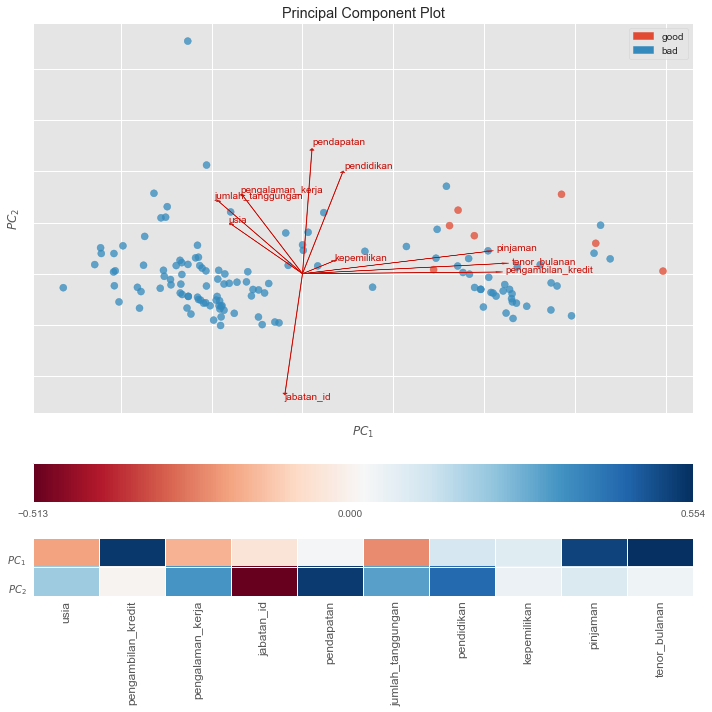

In [18]:
visual.pca_detail(df,mark='kat_status',labels=["good", "bad"],dim=2,
                  title='testing',footnote='data from 2020')

Eigen values of the data:  [20077201099316.715, 5191275874847.586, 76.2104, 2.5012, 1.4484, 1.1104, 0.4698, 0.4253, 0.3575, 0.0334]

For linear data, the first few eigen values will be significantly large, and the rest of the values will be almost zero

For non-linear data, many principal components will have non-zero eigevalues. the eigenvector gives the direction of the maximum spread of data.
If the data is non-linear and is not spread in a single direction, then the eigenvectors will have non-zero eigenvalues. it is because there is no one general direction in which the data is spread


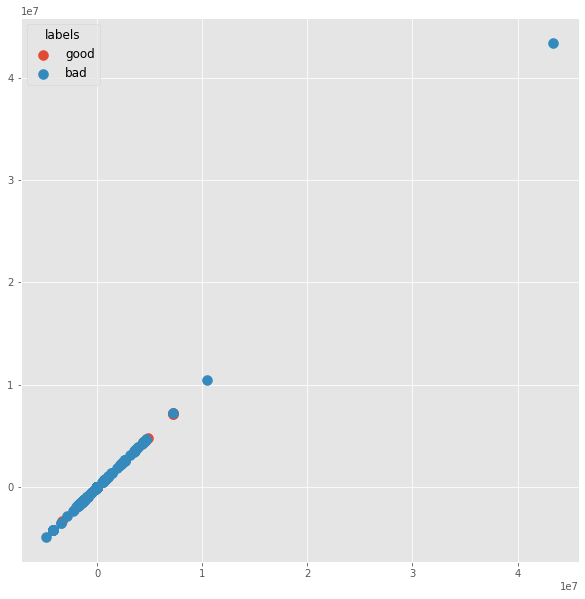

In [25]:
visual.pca_plot(df,mark='kat_status',labels=['good','bad'])

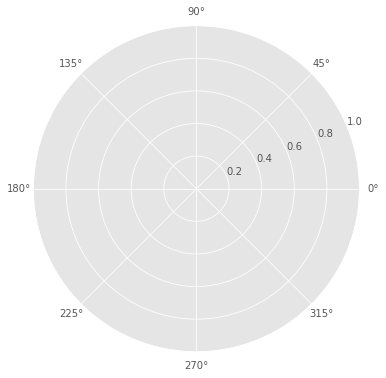

In [16]:
visual.radar_plot(df,['pengalaman_kerja'],[2,3,4,5,6,7,8],['#1aaf6c', '#429bf4','#d42cea'],'test')

tenor_bulanan,1.0,6.0,All
kat_status,,,
0,0.00,5.26,5.26
1,65.41,29.32,94.74
All,65.41,34.59,100.00


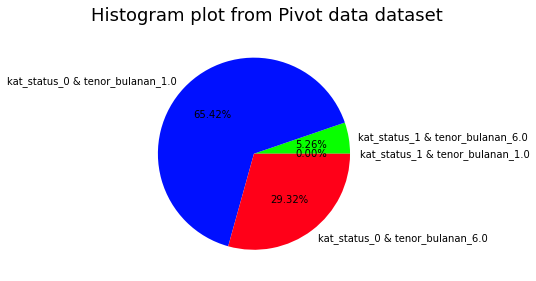

In [80]:
visual.pivot_pie_plot(df,"kat_status", "tenor_bulanan",title='Pivot data')

# sanddance

In [5]:
visual.sanddance(df,height="640px")

Explorer(height='640px')

# likert plot

In [194]:
np.random.seed(42)
data = pd.DataFrame(np.random.choice(plot_likert.scales.agree, (10,2)), columns=['Question 1',' Question 2'])
data

,Question 1,Question 2
0,Agree,Strongly agree
1,Neither agree nor disagree,Strongly agree
2,Strongly agree,Disagree
3,Neither agree nor disagree,Neither agree nor disagree
4,Neither agree nor disagree,Strongly agree
5,Agree,Neither agree nor disagree
6,Strongly agree,Disagree
7,Agree,Disagree
8,Agree,Strongly agree
9,Strongly disagree,Agree


In [197]:
labels = plot_likert.scales.agree

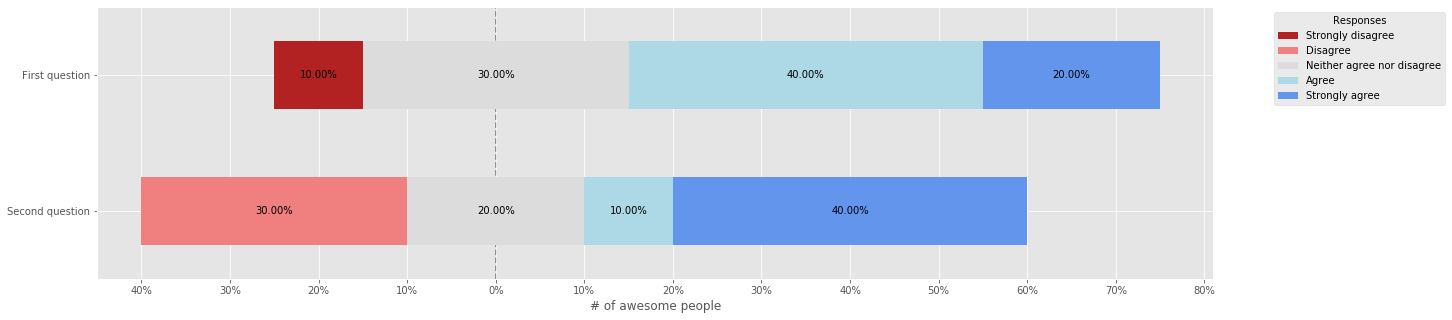

In [203]:
visual.likert(data,labels,x_label='# of awesome people',
              y_label=['Second question', 'First question'],title=None,figsize=(20,5))